# Importação Das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Pi_modelo import uls
from sklearn.linear_model import LinearRegression
import random

In [2]:
import sys
sys.path.insert(1, '../Arquivos_Auxiliares')
import Funcoes_auxiliares as f

# Importação Dos Dados

In [3]:
resultados_np = pd.read_csv("../Resultados/tabelas/Resultados_pi/resultados_pi_np.csv").iloc[:,1:]
resultados_sar = pd.read_csv("../Resultados/tabelas/Resultados_pi/resultados_pi_sar.csv").iloc[:,1:]


In [4]:
resultados_np = f.arrumaDataFrame(resultados_np)
resultados_sar = f.arrumaDataFrame(resultados_sar)

# Análise Dos Resultados

## Análise do Resultados X

In [5]:
result_x_np = f.describe_var(resultados_np,'x')
result_x_sar = f.describe_var(resultados_sar,'x')


In [6]:
boxPlot_x_np = f.dataFrame_to_boxPlot(result_x_np,'value')
boxPlot_x_sar = f.dataFrame_to_boxPlot(result_x_sar,'value')

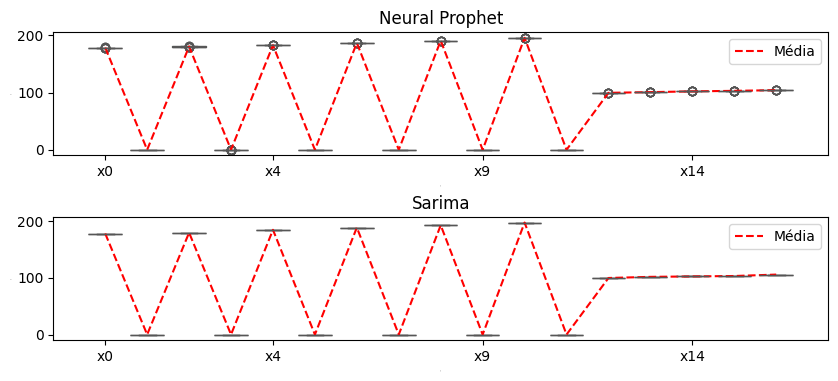

In [7]:
fig=plt.figure(figsize=(10,4))
#fig.suptitle('Distribuição da Produção por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(2,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_x_np,x='x',y='value',color='turquoise')
plt.plot(result_x_np.columns,result_x_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(2,1,2)
ax.set_title('Sarima')
sns.boxplot(data=boxPlot_x_sar,x='x',y='value',color='turquoise')
plt.plot(result_x_sar.columns,result_x_sar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_sar.columns)/5)+1)])
plt.legend()


plt.savefig('../Resultados/img/ResultX.png', format='png', bbox_inches='tight',pad_inches = 0.1)

In [8]:
result_s_np = f.describe_var(resultados_np,'s')
result_s_sar = f.describe_var(resultados_sar,'s')


boxPlot_s_np = f.dataFrame_to_boxPlot(result_s_np,'value')
boxPlot_s_sar = f.dataFrame_to_boxPlot(result_s_sar,'value')


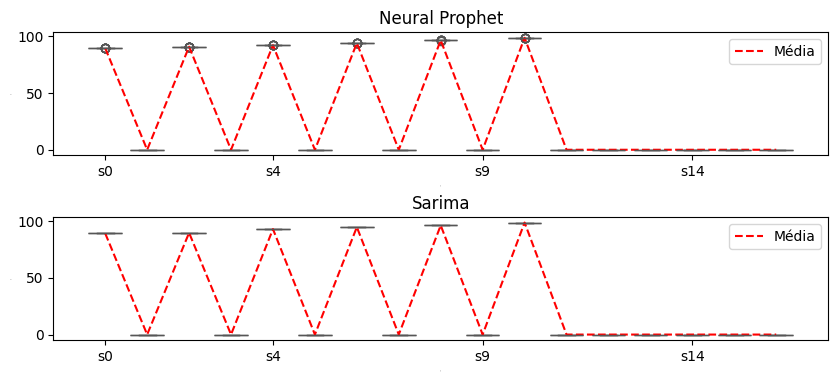

In [9]:
fig=plt.figure(figsize=(10,4))
#fig.suptitle('Distribuição do Estoque por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(2,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_s_np,x='s',y='value',color='turquoise')
plt.plot(result_s_np.columns,result_s_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(2,1,2)
ax.set_title('Sarima')
sns.boxplot(data=boxPlot_s_sar,x='s',y='value',color='turquoise')
plt.plot(result_s_sar.columns,result_s_sar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_sar.columns)/5)+1)])
plt.legend()


plt.savefig('../Resultados/img/ResultS.png', format='png', bbox_inches='tight',pad_inches = 0.1)

## Análise do Resultados RunTime

## Análise do Resultados OBbjBound/ OBbjVal

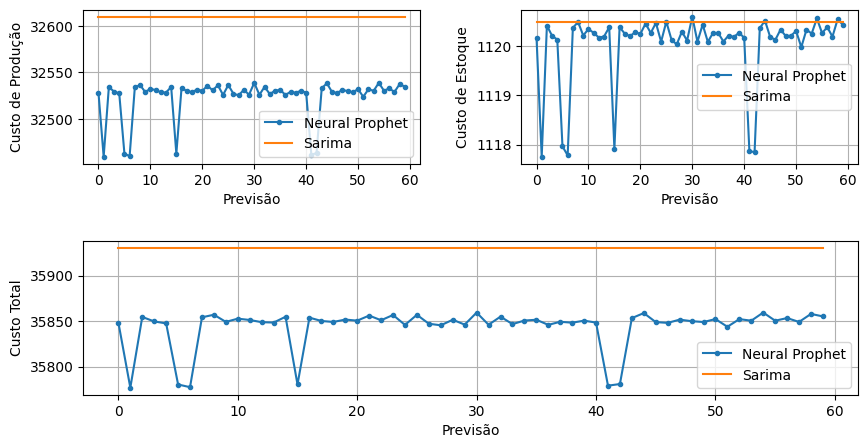

In [10]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

ax=fig.add_subplot(2,1,2)
plt.plot(resultados_np['ObjVal'],label='Neural Prophet',marker='.')
plt.plot(resultados_sar['ObjVal'],label='Sarima')
plt.xlabel('Previsão')
plt.ylabel('Custo Total')
plt.grid(axis='both')
plt.legend()

ax=fig.add_subplot(2,2,2)
plt.plot(result_s_np.sum(axis=1)*2,label='Neural Prophet',marker='.')
plt.plot(result_s_sar.sum(axis=1)*2,label='Sarima')
plt.xlabel('Previsão')
plt.ylabel('Custo de Estoque')
plt.grid(axis='both')
plt.legend()


ax=fig.add_subplot(2,2,1)
plt.plot(result_x_np.sum(axis=1)*20,label='Neural Prophet',marker='.')
plt.plot(result_x_sar.sum(axis=1)*20,label='Sarima')
plt.xlabel('Previsão')
plt.ylabel('Custo de Produção')
plt.grid(axis='both')
plt.legend()

In [11]:
lr = LinearRegression()
lr.fit(np.array(result_s_np.sum(axis=1)*2).reshape(-1, 1),np.array(result_x_np.sum(axis=1)*20))
y_pred = lr.predict(np.array(result_s_np.sum(axis=1)*2).reshape(-1, 1))

In [12]:
lr.intercept_

575.9957592901264

In [13]:
result_x_np.loc[1].sum()*20

32459.125213623047

In [15]:
resultados_np.head(1)

,x,s,y,Demanda,ObjVal,ObjBound,RunTime,NodeCount,Status
0,"[178.80184936523438, 0.0, 180.6158676147445, 1...","[89.25847625732422, 0.0, 90.55781555175622, 0....","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[89.54337310791016, 89.25847625732422, 90.0580...",35848.405182,35848.405182,0.01,1.0,1


In [16]:
result_demanda_np = f.describe_var(resultados_np,'Demanda')

In [57]:
lambda_v = []
for j in range(60):
    alpha = (result_s_np.loc[j].sum()-result_demanda_np[[f'Demanda{i}' for i in [12,13,14,15,16]]].loc[j].sum())
    print(alpha)
    beta = (result_s_np.loc[j].sum()-result_demanda_np[[f'Demanda{i}' for i in [0,2,4,6,8,10]]].loc[j].sum())
    lambda_v.append(((beta+alpha)*20)/(result_s_np.loc[j].sum()*2))

lambda_dict = {}
lambda_dict['lambda'] = lambda_v
lambda_dict = pd.DataFrame(lambda_dict)

49.982460021971065
49.83798980712686
50.06943511962709
49.9922409057599
49.976898193357556
49.769798278807
49.856849670408565
50.02650451659997
50.07318878173646
50.002769470213025
50.050933837888806
50.017272949216704
49.96693420409974
50.0281295776349
50.03131103515443
49.880615234372954
50.05058288574037
50.03002166747865
50.01371765136514
50.00575256347474
49.99737548827943
50.06137847900209
50.02646636962709
50.05152893066224
49.97308349609193
50.086532592771846
49.99430084228311
49.93081665038858
50.03761291503724
50.00453186034974
50.11548614501771
49.971687316892485
50.084358215329985
49.940025329588025
50.03540802001771
50.004241943357556
49.99841308593591
50.01049804687341


50.02742004394349
50.045028686521846
49.98988342284974
49.87999725341615
49.78607940673646
50.04386901855287
50.04106140136537
49.99158477783021
49.93740844726403
50.081504821775525
49.96888732909974
50.021545410154204
50.016220092771846
49.921592712400525
50.05363464355287
50.01647949218591
50.09024047851358
50.03315734863122
50.08168029784974
49.9965133666974
50.109374999997954
50.072349548338025


In [58]:
lambda_dict.describe()

,lambda
count,60.000000
mean,0.961793
std,0.000737
min,0.959282
25%,0.961464
50%,0.961776
75%,0.962225
max,0.963164


In [62]:
e = 10
(30-lambda_dict.loc[e])*result_s_np.loc[e].sum()*2, result_x_np.loc[e].sum()*20

(lambda    32532.304687
 Name: 10, dtype: float64,
 32532.3046875)

In [13]:
previsoes_np = {}
previsoes = []
for index in range(60):
    with open(f'../Resultados/tabelas/Previsoes/Prev_pro/Previsao_pro{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_np['demandas'] = previsoes
previsoes_np = pd.DataFrame(previsoes_np)
previsoes_np.head()

,demandas
0,"[89.54337310791016, 89.25847625732422, 90.0580..."
1,"[89.42227172851562, 89.07727813720703, 89.8582..."
2,"[89.5674057006836, 89.30921173095703, 90.11029..."
3,"[89.55894470214844, 89.2660140991211, 90.06253..."
4,"[89.55184936523438, 89.26032257080078, 90.0593..."


In [14]:
previsao_demanda_np = f.describe_var(previsoes_np,'demandas')

In [15]:
previsao_demanda_np.describe()

,demandas0,demandas1,demandas2,demandas3,demandas4,demandas5,demandas6,demandas7,demandas8,demandas9,demandas10,demandas11,demandas12,demandas13,demandas14,demandas15,demandas16
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,89.546331,89.270036,90.065607,90.559649,91.067841,91.887247,93.227429,93.697535,94.734368,96.219515,97.518542,98.385213,99.612714,100.840840,102.166450,103.101362,104.294618
std,0.045760,0.066277,0.075346,0.086305,0.083610,0.072395,0.076014,0.066087,0.068823,0.060378,0.057672,0.053535,0.058840,0.049125,0.058899,0.073542,0.078561
min,89.405350,89.031433,89.807121,90.284920,90.802109,91.670052,92.932228,93.397858,94.477402,95.941940,97.280823,98.196129,99.399544,100.629776,101.981552,102.853294,104.038788
25%,89.544117,89.258862,90.054455,90.556229,91.065937,91.891911,93.240900,93.702477,94.748390,96.222099,97.517094,98.395313,99.625824,100.849606,102.177969,103.108135,104.303684
50%,89.559357,89.272736,90.066067,90.567051,91.080708,91.901756,93.251308,93.719009,94.757080,96.238342,97.535030,98.402378,99.631702,100.854359,102.184311,103.118595,104.312946
75%,89.568308,89.297602,90.100641,90.597828,91.105518,91.921677,93.260113,93.726576,94.762875,96.246889,97.544735,98.408739,99.636671,100.862652,102.188488,103.131512,104.327017
max,89.611420,89.368614,90.185501,90.683670,91.173096,91.968369,93.278023,93.740860,94.770195,96.264236,97.568565,98.416290,99.643402,100.875053,102.208160,103.174438,104.361832


In [16]:
centroide_np = previsao_demanda_np.describe().iloc[1].values
desvios = [np.linalg.norm(centroide_np-simulacao_k) for simulacao_k in previsao_demanda_np.values]


In [17]:
custo_producao = result_x_np.sum(axis=1)*20


media_custo_producao_np = custo_producao.mean()
desvio_custo_producao = [abs(media_custo_producao_np-custo_k) for custo_k in custo_producao]



custo_estoque = result_s_np.sum(axis=1)*2


media_custo_estoque_np = custo_estoque.mean()
desvio_custo_estoque = [abs(media_custo_estoque_np-custo_k) for custo_k in custo_estoque]



custo_total = resultados_np['ObjVal']


media_custo_total_np = custo_total.mean()
desvio_custo_total = [abs(media_custo_total_np-custo_k) for custo_k in custo_total]


In [18]:
count = 0
for i in desvio_custo_total:
    if i>=60:print(f'count={count}, valor = {i}')
    count+=1

count=1, valor = 67.06529947916715
count=5, valor = 63.53031107584684
count=6, valor = 66.45639750162809
count=15, valor = 63.51024576822965
count=41, valor = 64.8032755533859
count=42, valor = 63.02194925944059


Text(0, 0.5, 'Desvio Custo Total')

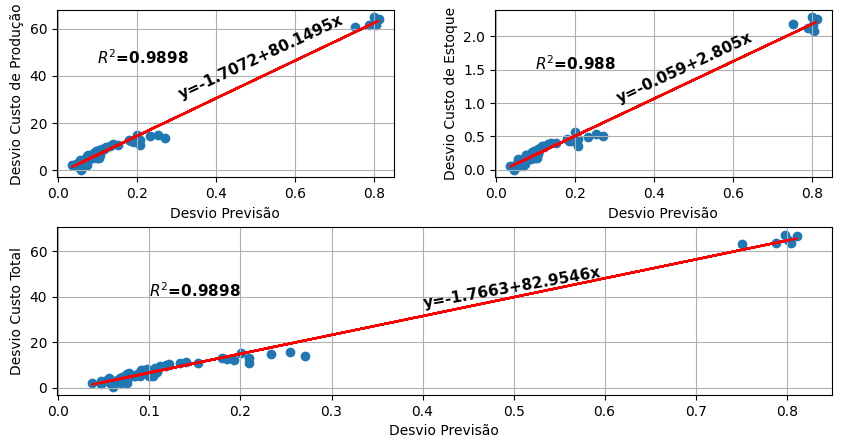

In [19]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax=fig.add_subplot(2,2,1)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_producao)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(0.1, 45, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_producao),4)}', fontsize=11,fontweight=550)
plt.text(0.3, 30, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=25)
plt.plot(desvios,y_pred,color='red')
plt.scatter(desvios,desvio_custo_producao)
plt.grid(axis='both')
plt.xlabel('Desvio Previsão')
plt.ylabel('Desvio Custo de Produção')


ax=fig.add_subplot(2,2,2)
lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_estoque)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(0.1, 1.5, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_estoque),4)}', fontsize=11,fontweight=550)
plt.text(0.3, 1, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=25)
plt.plot(desvios,y_pred,color='red')
plt.scatter(desvios,desvio_custo_estoque)
plt.grid(axis='both')
plt.xlabel('Desvio Previsão')
plt.ylabel('Desvio Custo de Estoque') 

ax=fig.add_subplot(2,1,2)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_total)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(0.1, 40, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_total),4)}', fontsize=11,fontweight=550)
plt.text(0.4, 35, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=10)
plt.plot(desvios,y_pred,color='red')
plt.scatter(desvios,desvio_custo_total)
plt.grid(axis='both')
plt.xlabel('Desvio Previsão')
plt.ylabel('Desvio Custo Total') 

In [20]:
ic_np = pd.read_csv('../Resultados/tabelas/Intervalos_Confianca/NP/IC_NP0')[['yhat1 2.5%','yhat1 97.5%']]
ic_sa = pd.read_csv('../Resultados/tabelas/Intervalos_Confianca/SA/IC_SA0')[['lower demandas','upper demandas']]

# Desvios Neural Prophet

In [21]:
'''
simulacoes = {}
indice = 1
for ic in ic_np.values:
    coluna = []
    for simulacao in range(60):
        coluna.append(random.uniform(ic[0], ic[1]))
    simulacoes[f'x{indice}'] = coluna
    indice+=1

simulacoes = pd.DataFrame(simulacoes)
simulacoes.to_csv("../Resultados/tabelas/simulacoes/simalucao_np.csv")
'''
simulacoes = pd.read_csv("../Resultados/tabelas/simulacoes/simalucao_np.csv").drop('Unnamed: 0',axis=1)

In [22]:
resultados_simu = [] 
for i in simulacoes.values:
    resultados_simu.append(uls('../Modelo_pi/ULS_instancia.txt',i))

Restricted license - for non-production use only - expires 2024-10-28


In [23]:
resultados_simu = pd.DataFrame(resultados_simu)

In [24]:
simu_x = f.describe_var(resultados_simu,'x')
simu_s = f.describe_var(resultados_simu,'s')
simu_y = f.describe_var(resultados_simu,'y')
boxPlot_y_simu_np = f.dataFrame_to_boxPlot(simu_y,'value')

In [25]:
centroide = simulacoes.describe().iloc[1].values
desvios_np = [np.linalg.norm(centroide_np-simulacao_k) for simulacao_k in simulacoes.values]

In [26]:
custo_total = resultados_simu['ObjVal']

desvio_custo_total_np = [abs(media_custo_total_np-custo_k) for custo_k in custo_total]

In [27]:
custo_producao = simu_x.sum(axis=1)*20

desvio_custo_producao_np = [abs(media_custo_producao_np-custo_k) for custo_k in custo_producao]



custo_estoque = simu_s.sum(axis=1)*2

desvio_custo_estoque_np = [abs(media_custo_estoque_np-custo_k) for custo_k in custo_estoque]

Text(0, 0.5, 'Desvio Custo Total')

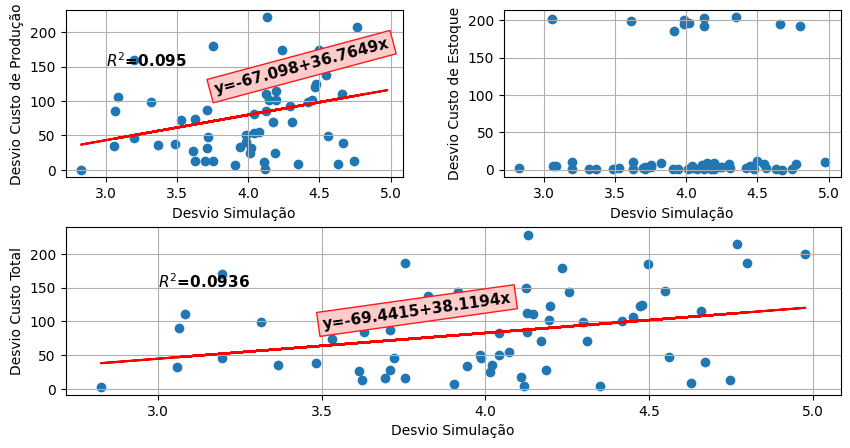

In [28]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax=fig.add_subplot(2,2,1)

lr = LinearRegression()
lr.fit(np.array(desvios_np).reshape(-1, 1),desvio_custo_producao_np)
y_pred = lr.predict(np.array(desvios_np).reshape(-1, 1))


plt.text(3, 150, r'$R^{2}$='+f'{round(lr.score(np.array(desvios_np).reshape(-1, 1), desvio_custo_producao_np),4)}', fontsize=11,fontweight=550)
plt.text(3.75, 110, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=15,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios_np,y_pred,color='red')

plt.scatter(desvios_np,desvio_custo_producao_np)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Produção')

ax=fig.add_subplot(2,2,2)
plt.scatter(desvios_np,desvio_custo_estoque_np)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Estoque') 


ax=fig.add_subplot(2,1,2)

lr = LinearRegression()
lr.fit(np.array(desvios_np).reshape(-1, 1),desvio_custo_total_np)
y_pred = lr.predict(np.array(desvios_np).reshape(-1, 1))


plt.text(3, 150, r'$R^{2}$='+f'{round(lr.score(np.array(desvios_np).reshape(-1, 1), desvio_custo_total_np),4)}', fontsize=11,fontweight=550)
plt.text(3.5, 90, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=8,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios_np,y_pred,color='red')

plt.scatter(desvios_np,desvio_custo_total_np)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo Total') 

# Desvios Sarima

In [29]:
'''
simulacoes = {}
indice = 1
for ic in ic_sa.values:
    coluna = []
    for simulacao in range(60):
        coluna.append(random.uniform(ic[0], ic[1]))
    simulacoes[f'x{indice}'] = coluna
    indice+=1

simulacoes = pd.DataFrame(simulacoes)
simulacoes.to_csv("../Resultados/tabelas/simulacoes/simalucao_sa.csv")
'''

simulacoes = pd.read_csv("../Resultados/tabelas/simulacoes/simalucao_sa.csv").drop('Unnamed: 0',axis=1)

In [30]:
resultados_simu = [] 
for i in simulacoes.values:
    resultados_simu.append(uls('../Modelo_pi/ULS_instancia.txt',i))
resultados_simu = pd.DataFrame(resultados_simu)

In [31]:
simu_x = f.describe_var(resultados_simu,'x')
simu_s = f.describe_var(resultados_simu,'s')

In [32]:
simu_y = f.describe_var(resultados_simu,'y')

In [33]:
boxPlot_y_simu = f.dataFrame_to_boxPlot(simu_y,'value')

Text(0, 0.5, 'Qtd Simulações')

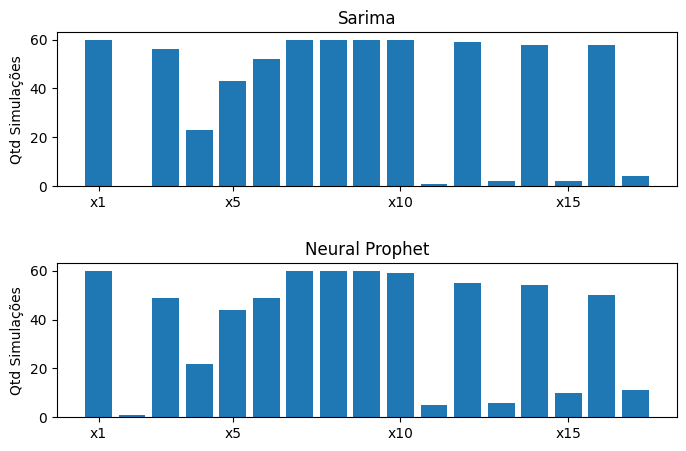

In [34]:
fig=plt.figure(figsize=(8,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
dataPlot = boxPlot_y_simu.groupby('y').sum()

ax=fig.add_subplot(2,1,1)
ax.set_title('Sarima')
plt.bar([f'x{i}' for i in range(1,18)],dataPlot['value'].values)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(simu_y.columns)/5)+1)])
plt.ylabel('Qtd Simulações')

ax=fig.add_subplot(2,1,2)
ax.set_title('Neural Prophet')
plt.bar([f'x{i}' for i in range(1,18)],boxPlot_y_simu_np.groupby('y').sum()['value'].values)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(simu_y.columns)/5)+1)])
plt.ylabel('Qtd Simulações')

In [35]:
prev_sa = [88.74998867860539, 88.99998354149353, 89.74998696355055, 89.49996602379443, 91.4999770808584, 92.74997312624048, 93.74998444961963, 94.49997338450302, 96.24997654025938, 95.99997298500277, 98.49997521666666, 98.49996942184696, 99.49996770679212, 101.49996862284647, 102.24997639102395, 102.99995953110214, 105.49997769859534]

In [36]:
desvios = [np.linalg.norm(prev_sa-simulacao_k) for simulacao_k in simulacoes.values]

In [37]:
custo_total = resultados_simu['ObjVal']

desvio_custo_total = [abs(resultados_sar['ObjVal'][0]-custo_k) for custo_k in custo_total]


custo_producao = simu_x.sum(axis=1)*20

desvio_custo_producao = [abs(result_x_sar.values[0].sum()*20-custo_k) for custo_k in custo_producao]



custo_estoque = simu_s.sum(axis=1)*2

desvio_custo_estoque = [abs(result_s_sar.values[0].sum()*2-custo_k) for custo_k in custo_estoque]




Text(0, 0.5, 'Desvio Custo Total')

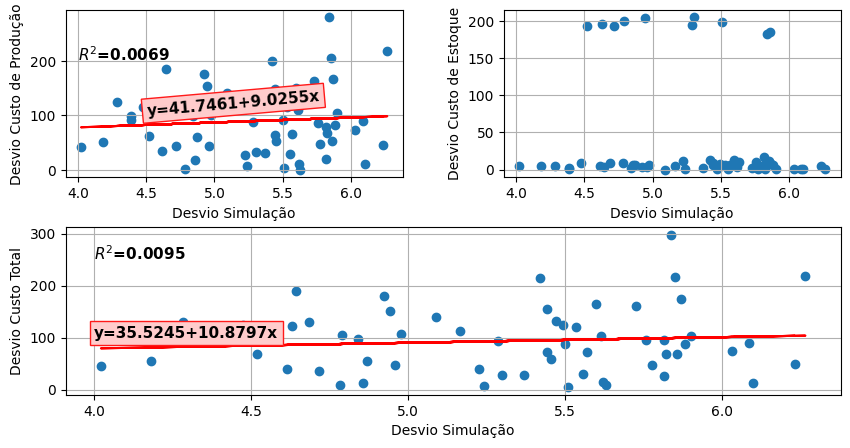

In [38]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax=fig.add_subplot(2,2,1)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_producao)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(4, 200, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_producao),4)}', fontsize=11,fontweight=550)
plt.text(4.5, 100, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=5,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios,y_pred,color='red')

plt.scatter(desvios,desvio_custo_producao)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Produção')



ax=fig.add_subplot(2,2,2)
plt.scatter(desvios,desvio_custo_estoque)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo de Estoque')



ax=fig.add_subplot(2,1,2)

lr = LinearRegression()
lr.fit(np.array(desvios).reshape(-1, 1),desvio_custo_total)
y_pred = lr.predict(np.array(desvios).reshape(-1, 1))


plt.text(4, 250, r'$R^{2}$='+f'{round(lr.score(np.array(desvios).reshape(-1, 1), desvio_custo_total),4)}', fontsize=11,fontweight=550)
plt.text(4, 100, f'y={round(lr.intercept_,4)}+{round(lr.coef_[0],4)}x', fontsize=11,fontweight=550,rotation=0,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.1, 0.1),
                   fc=(1., 0.8, 0.8),
                   ))
plt.plot(desvios,y_pred,color='red')

plt.scatter(desvios,desvio_custo_total)
plt.grid(axis='both')
plt.xlabel('Desvio Simulação')
plt.ylabel('Desvio Custo Total') 

In [39]:
df_desvios_totais = {}
df_desvios_totais['desvios'] = desvio_custo_total_np+desvio_custo_total
df_desvios_totais['Alg'] = ['Neural Prophet' for i in range(60)]+['Sarima' for i in range(60)]
df_desvios_totais = pd.DataFrame(df_desvios_totais)

df_desvios_p = {}
df_desvios_p['desvios'] = desvio_custo_producao_np+desvio_custo_producao
df_desvios_p['Alg'] = ['Neural Prophet' for i in range(60)]+['Sarima' for i in range(60)]
df_desvios_p = pd.DataFrame(df_desvios_p)

df_desvios_e = {}
df_desvios_e['desvios'] = desvio_custo_estoque_np+desvio_custo_estoque
df_desvios_e['Alg'] = ['Neural Prophet' for i in range(60)]+['Sarima' for i in range(60)]
df_desvios_e = pd.DataFrame(df_desvios_e)

Text(0.5, 0, 'Desvio Custo Estoque')

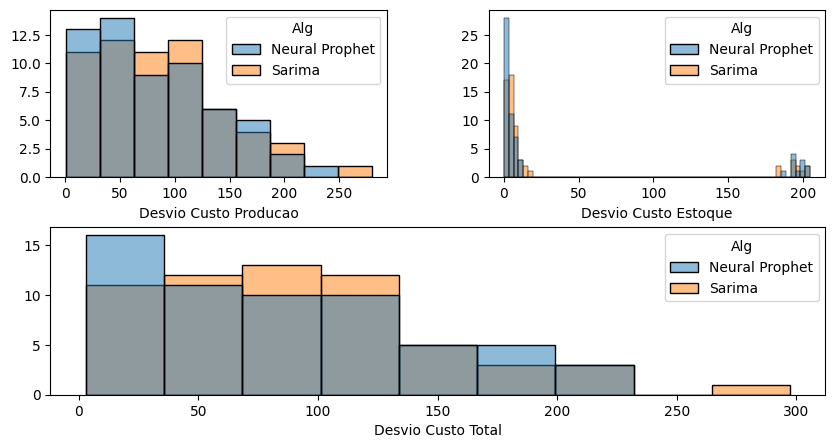

In [40]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax=fig.add_subplot(2,1,2)

sns.histplot(data=df_desvios_totais,x='desvios', hue='Alg')
plt.ylabel('')
plt.xlabel('Desvio Custo Total')

ax=fig.add_subplot(2,2,1)

sns.histplot(data=df_desvios_p,x='desvios', hue='Alg')
plt.ylabel('')
plt.xlabel('Desvio Custo Producao')

ax=fig.add_subplot(2,2,2)

sns.histplot(data=df_desvios_e,x='desvios', hue='Alg')
plt.ylabel('')
plt.xlabel('Desvio Custo Estoque')
